<div align="right">Ang Kian Hwee, 1st May 2020</div>

<h1>South Korea's COVID19 situation</h1>

In this notebook, we will attempt to predict the number of confirmed cases in each province for each day.

**Imports**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import warnings
plt.style.use("ggplot")
warnings.filterwarnings("ignore")
%matplotlib inline

**Reading in data/Data transformation**

In [229]:
weather_df = pd.read_csv("data/Weather.csv")
time_province_df = pd.read_csv("data/TimeProvince.csv")
region_df = pd.read_csv("data/Region.csv")

In [230]:
weather_df.head()
# How to interpret most_wind_direction values
# north wind: 0
# east wind: 90
# south wind: 180
# west wind: 270

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,1 01 2016,1.200,-3.300,4.000,0.000,3.500,90.000,73.000
1,11000,Busan,1 01 2016,5.300,1.100,10.900,0.000,7.400,340.000,52.100
2,12000,Daegu,1 01 2016,1.700,-4.000,8.000,0.000,3.700,270.000,70.500
3,13000,Gwangju,1 01 2016,3.200,-1.500,8.100,0.000,2.700,230.000,73.100
4,14000,Incheon,1 01 2016,3.100,-0.400,5.700,0.000,5.300,180.000,83.900


We shall remove `min_temp` and `max_temp` since we have avg_temp.

We will also use records dated 20/01/2020 till 07/04/2020 as that is when the first COVID19 case appeared.

In [231]:
weather_df.drop(columns=["min_temp", "max_temp"], inplace=True)

weather_df.date = pd.to_datetime(weather_df.date,format="%d %m %Y")
# weather_df.head()
weather_df = weather_df[weather_df["date"] >= pd.to_datetime("2020-01-20", format="%Y-%m-%d")]

In [232]:
weather_df.head()

,code,province,date,avg_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23679,10000,Seoul,2020-01-20,0.700,0.000,5.700,270.000,46.800
23680,11000,Busan,2020-01-20,5.100,0.000,6.100,270.000,45.600
23681,12000,Daegu,2020-01-20,4.600,0.000,6.400,290.000,44.100
23682,13000,Gwangju,2020-01-20,4.000,0.000,3.300,270.000,63.100
23683,14000,Incheon,2020-01-20,1.200,0.000,8.600,320.000,56.000


Since the values for confirmed, released, death are cumulative for each provinces, we need to devise a method to calculate the number of cases per day for each province.

In [233]:
# function to calculate each day's number of cases in each province
def get_cases(column):
    provinces = time_province_df["province"].unique()
    new_column = column+"_per_day"
    time_province_df[new_column] = time_province_df[column]

    for province in provinces:
        time_province_df.loc[time_province_df["province"]==province, new_column] = \
        time_province_df.loc[time_province_df["province"]==province, column].iloc[1:] - time_province_df.loc[time_province_df["province"]==province, column].shift(1)
    
    time_province_df[new_column].replace(np.NaN, 0, inplace=True)
        
    

In [234]:
# get number of cases for each day per province
time_province_df.date = pd.to_datetime(time_province_df.date, format="%Y-%m-%d")
get_cases("confirmed")
get_cases("released")
get_cases("deceased")

In [235]:
time_province_df.tail(10)

,date,time,province,confirmed,released,deceased,confirmed_per_day,released_per_day,deceased_per_day
1333,2020-04-07,0,Sejong,46,17,0,0.000,0.000,0.000
1334,2020-04-07,0,Gyeonggi-do,590,226,7,10.000,13.000,0.000
1335,2020-04-07,0,Gangwon-do,47,24,1,2.000,1.000,0.000
1336,2020-04-07,0,Chungcheongbuk-do,45,29,0,0.000,0.000,0.000
1337,2020-04-07,0,Chungcheongnam-do,137,104,0,1.000,2.000,0.000
1338,2020-04-07,0,Jeollabuk-do,16,7,0,0.000,0.000,0.000
1339,2020-04-07,0,Jeollanam-do,15,4,0,0.000,0.000,0.000
1340,2020-04-07,0,Gyeongsangbuk-do,1317,934,46,1.000,12.000,1.000
1341,2020-04-07,0,Gyeongsangnam-do,112,80,0,1.000,0.000,0.000
1342,2020-04-07,0,Jeju-do,12,4,0,0.000,0.000,0.000


In [236]:
time_province_df.loc[time_province_df["province"]=="Daegu"]

,date,time,province,confirmed,released,deceased,confirmed_per_day,released_per_day,deceased_per_day
2,2020-01-20,16,Daegu,0,0,0,0.000,0.000,0.000
19,2020-01-21,16,Daegu,0,0,0,0.000,0.000,0.000
36,2020-01-22,16,Daegu,0,0,0,0.000,0.000,0.000
53,2020-01-23,16,Daegu,0,0,0,0.000,0.000,0.000
70,2020-01-24,16,Daegu,0,0,0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
1260,2020-04-03,0,Daegu,6734,4434,121,9.000,151.000,4.000
1277,2020-04-04,0,Daegu,6761,4673,122,27.000,239.000,1.000
1294,2020-04-05,0,Daegu,6768,4773,127,7.000,100.000,5.000
1311,2020-04-06,0,Daegu,6781,4865,129,13.000,92.000,2.000


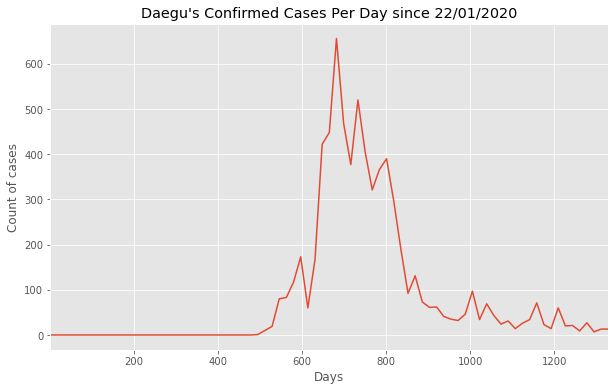

In [259]:
ax = time_province_df.loc[time_province_df["province"]=="Daegu"]\
                                        ["confirmed_per_day"].plot(figsize=(10,6))
ax.set_xlabel("Days")
ax.set_ylabel("Count of cases")
ax.set_title("Daegu's Confirmed Cases Per Day since 22/01/2020")
plt.show()

**Merge relevant columns together**

In [238]:
# merge weather and cases per province together
time_province_df_filtered = time_province_df.loc[:,["date", "province", "confirmed_per_day", 
                                                    "released_per_day", "deceased_per_day"]]
weather_case_combine = time_province_df_filtered.merge(weather_df, how="left", on=["date", "province"])
weather_case_combine.drop(["code"], axis=1, inplace=True)

In [239]:
# we will assume the weather conditions on the 7th April 2020 to be the same as the 6th April 2020
provinces = weather_case_combine["province"].unique()
for province in provinces:
    weather_case_combine[weather_case_combine["province"]==province] = \
    weather_case_combine[weather_case_combine["province"]==province].fillna(method="ffill")
    
# re-name the columns to be more intuitive
weather_case_combine.columns = {
    "date": "date",
    "province": "province",
    "confirmed_per_day": "confirmed_per_day",
    "released_per_day": "recovery_per_day",
    "deceased_per_day": "death_per_day", 
    "avg_temp": "avg_temp",
    "precipitation": "precipitation",
    "max_wind_speed": "wind_speed",
    "most_wind_direction": "wind_direction",
    "avg_relative_humidity": "avg_humidity"
}.values()

We will check for any empty fields just to be sure our data is ready to be use for prediction.

In [240]:
# check for any null/empty cells
weather_case_combine.isnull().any()

date                 False
province             False
confirmed_per_day    False
recovery_per_day     False
death_per_day        False
avg_temp              True
precipitation         True
wind_speed            True
wind_direction        True
avg_humidity          True
dtype: bool

In [241]:
weather_case_combine[weather_case_combine["province"]=="Sejong"].head()

,date,province,confirmed_per_day,recovery_per_day,death_per_day,avg_temp,precipitation,wind_speed,wind_direction,avg_humidity
7,2020-01-20,Sejong,0.000,0.000,0.000,nan,nan,nan,nan,nan
24,2020-01-21,Sejong,0.000,0.000,0.000,nan,nan,nan,nan,nan
41,2020-01-22,Sejong,0.000,0.000,0.000,nan,nan,nan,nan,nan
58,2020-01-23,Sejong,0.000,0.000,0.000,nan,nan,nan,nan,nan
75,2020-01-24,Sejong,0.000,0.000,0.000,nan,nan,nan,nan,nan


We will drop all rows that have all rows with empty cells in them. 

In [242]:
weather_case_combine.dropna(inplace=True)


# check for any null/empty cells
weather_case_combine.isnull().any()

date                 False
province             False
confirmed_per_day    False
recovery_per_day     False
death_per_day        False
avg_temp             False
precipitation        False
wind_speed           False
wind_direction       False
avg_humidity         False
dtype: bool

In [243]:
# Glimpse at final dataset
weather_case_combine.sample(5)

,date,province,confirmed_per_day,recovery_per_day,death_per_day,avg_temp,precipitation,wind_speed,wind_direction,avg_humidity
623,2020-02-25,Chungcheongnam-do,1.000,0.000,0.000,6.600,40.800,5.100,50.000,90.100
591,2020-02-23,Jeollanam-do,0.000,0.000,0.000,5.800,0.000,8.000,290.000,53.300
973,2020-03-17,Gwangju,0.000,2.000,0.000,9.200,0.000,7.900,250.000,63.400
1024,2020-03-20,Gwangju,1.000,3.000,0.000,10.600,0.000,5.500,230.000,32.600
1325,2020-04-06,Jeju-do,0.000,0.000,0.000,10.700,0.000,3.600,270.000,56.800


Scaling of the values to improve predictions later on.

In [244]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(weather_case_combine.iloc[:, 2:])
# weather_case_combine_scaled = pd.DataFrame(scaler.transform(weather_case_combine.iloc[:, 2:]), 
#                                            columns=weather_case_combine.columns[2:])

# weather_case_combine.reset_index(drop=True, inplace=True) # found that both datasets' indexes were different which created Null values
# weather_case_combine_scaled = weather_case_combine.iloc[:, 0:2].join(weather_case_combine_scaled)
weather_case_combine_scaled = weather_case_combine.reset_index(drop=True)

**Correlation between variables**

In [245]:
weather_case_combine_scaled.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,confirmed_per_day,recovery_per_day,death_per_day,avg_temp,precipitation,wind_speed,wind_direction,avg_humidity
confirmed_per_day,1,0.11,0.44,0.023,-0.022,0.0008,-0.0083,0.053
recovery_per_day,0.11,1,0.65,0.18,-0.028,0.049,0.0037,-0.049
death_per_day,0.44,0.65,1,0.15,-0.018,0.053,0.002,-0.024
avg_temp,0.023,0.18,0.15,1,0.068,0.079,-0.15,0.038
precipitation,-0.022,-0.028,-0.018,0.068,1,0.069,-0.11,0.4
wind_speed,0.0008,0.049,0.053,0.079,0.069,1,0.19,-0.19
wind_direction,-0.0083,0.0037,0.002,-0.15,-0.11,0.19,1,-0.18
avg_humidity,0.053,-0.049,-0.024,0.038,0.4,-0.19,-0.18,1


<div class="alert alert-info">
The most correlated variable with our dependent variable <code>confirmed_per_day</code> is <code>death_per_day</code>, followed by <code>recovery_per_day</code>. The weather variables however, do not seem to have any correlations with our dependent variable. 

A thing to note here is we are trying to find the most correlated variables with our dependent variable for all provinces. It may turn out that certain weather variables such as <code>wind_direction</code> and <code>avg_humidity</code> has correlation as seen below.
</div>

In [246]:
weather_case_combine_scaled[weather_case_combine_scaled["province"]=="Daegu"].corr()\
.style.background_gradient(cmap='coolwarm', axis=None)\
.set_precision(2)

,confirmed_per_day,recovery_per_day,death_per_day,avg_temp,precipitation,wind_speed,wind_direction,avg_humidity
confirmed_per_day,1,-0.2,0.25,-0.015,-0.071,-0.028,-0.17,0.28
recovery_per_day,-0.2,1,0.54,0.65,-0.078,0.17,-0.11,-0.13
death_per_day,0.25,0.54,1,0.5,0.024,0.18,-0.093,-0.031
avg_temp,-0.015,0.65,0.5,1,0.0046,-0.075,-0.3,0.17
precipitation,-0.071,-0.078,0.024,0.0046,1,0.074,-0.15,0.51
wind_speed,-0.028,0.17,0.18,-0.075,0.074,1,0.25,-0.21
wind_direction,-0.17,-0.11,-0.093,-0.3,-0.15,0.25,1,-0.56
avg_humidity,0.28,-0.13,-0.031,0.17,0.51,-0.21,-0.56,1


<div class="alert alert-info">
From both correlation matrices, we observe that there could be an interaction term as a result of the high correlation between <code>recovery_per_day</code> and <code>death_per_day</code>. To account for that, we will create a new column called <code>recovery_death</code> in our dataset.
</div>

In [247]:
# creating interaction feature 
weather_case_combine_scaled["recovery_death"] = weather_case_combine_scaled["recovery_per_day"] \
                                            * weather_case_combine_scaled["death_per_day"]

In [249]:
weather_case_combine_scaled = weather_case_combine_scaled.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

# logging our dependent variable to avoid negative predictions
weather_case_combine_scaled["confirmed_per_day"] = weather_case_combine_scaled["confirmed_per_day"] + 1
weather_case_combine_scaled["confirmed_per_day"] = np.log(weather_case_combine_scaled["confirmed_per_day"])

In [258]:
# Here is how our final dataset looks like
weather_case_combine_scaled.sample(5)

,province,confirmed_per_day,recovery_per_day,death_per_day,recovery_death
917,Daejeon,0.000,0.000,0.000,0.000
159,Jeju-do,0.000,0.000,0.000,0.000
63,Jeju-do,0.000,0.000,0.000,0.000
220,Jeollanam-do,0.000,0.000,0.000,0.000
532,Gwangju,1.386,0.000,0.000,0.000


---

<h1>Prediction Time!!</h1>

<div class="alert alert-info">
We shall try to predict the number of confirmed cases per day for <b>Daegu</b> since that is 1 of the hotspot. So let's pick out the records relating to it and fit to our models!
    
In this notebook, we are going to try <code>Ridge Regression</code>, <code>Lasso Regression</code> and <code>Gradient Boosting Regressor</code> to predict the number of confirmed cases per day. 
</div>

In [251]:
# Preparing to split into Train and Test sets

# columns_to_drop = ["date", "recovery_per_day", "death_per_day"]
# columns_to_drop = ["date"]
columns_to_drop = ["date", "avg_temp", "precipitation", "wind_speed", "wind_direction", "avg_humidity"]
weather_case_combine_scaled = weather_case_combine_scaled.drop(columns_to_drop, axis=1)

In [252]:
from sklearn.model_selection import train_test_split

# get all Daegu's records
daegu_data = weather_case_combine_scaled[weather_case_combine_scaled["province"]=="Daegu"]

x_train, x_test, y_train, y_test = train_test_split(daegu_data.drop(["province", "confirmed_per_day"], axis=1), 
                                                    daegu_data.loc[:, "confirmed_per_day"], test_size=0.30,
                                                    shuffle=False)

**Ridge Regression**

In [253]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ridgeReg = linear_model.RidgeCV(alphas=[0.05, 0.1, 0.5, 1.0, 5, 10.0, 15], cv=20)
ridgeReg.fit(x_train, y_train)

ridge_pred = np.exp(ridgeReg.predict(x_test))-1 # logged form
print("R Squared:", r2_score( np.exp(y_test)-1, ridge_pred))
print("Mean squared error:", abs(mean_squared_error(np.exp(y_test)-1, np.exp(ridgeReg.predict(x_test))-1 )))

R Squared: -372.3805091783053
Mean squared error: 175115.45880462532


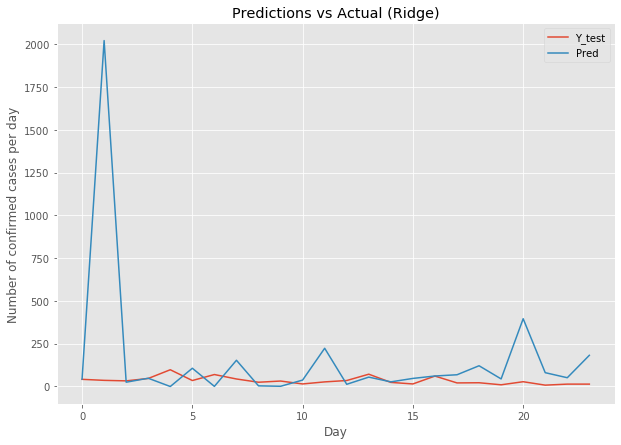

In [254]:
plt.figure(figsize=(10,7))
plt.plot(np.exp(y_test.reset_index(drop=True))-1, label="Y_test")
plt.plot(ridge_pred, label="Pred")
plt.title("Predictions vs Actual (Ridge)")
plt.xlabel("Day")
plt.ylabel("Number of confirmed cases per day")
plt.legend()
plt.show()

<div class="alert alert-info">
Our first model using Ridge Regression is so bad. With a very small R Squared (negative in fact) and a large Mean Squared Error, this model is not usable. While the predictions at the front are totally off from the actual values, the subsequent predictions are closer to the actual values.
</div>

**Lasso Regression**

In [255]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate

lassoReg = Lasso(alpha=1.3)
lassoReg.fit(x_train, y_train)

print("R squared:", lassoReg.score(x_test, y_test))
print("Mean squared error:", mean_squared_error(np.exp(y_test)-1, np.exp(lassoReg.predict(x_test))-1 ))

R squared: -10.3707715752382
Mean squared error: 88682.81839930585


In [256]:
# Results of 10 cross validations

result_lasso = cross_validate(lassoReg, x_test, y_test, cv=10, scoring="neg_mean_squared_error")

pd.set_option('display.float_format', '{:.3f}'.format)
pd.DataFrame(abs(result_lasso["test_score"])).T

,0,1,2,3,4,5,6,7,8,9
0,0.333,0.485,0.139,0.276,0.381,0.138,0.683,0.549,0.583,0.143


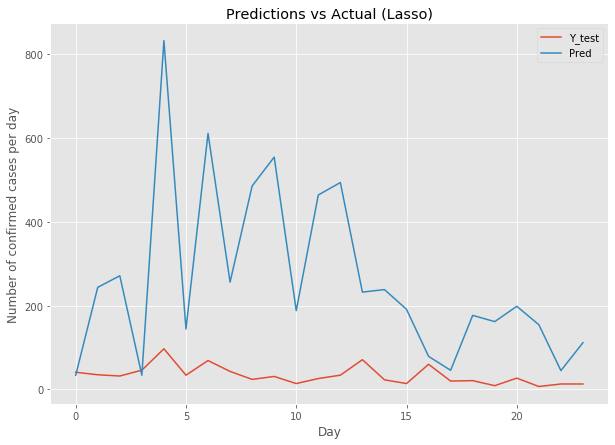

In [257]:
lasso_pred = np.exp(lassoReg.predict(x_test).tolist())-1

plt.figure(figsize=(10,7))
plt.plot(np.exp(y_test.reset_index(drop=True))-1, label="Y_test")
plt.plot(lasso_pred, label="Pred")
plt.title("Predictions vs Actual (Lasso)")
plt.xlabel("Day")
plt.ylabel("Number of confirmed cases per day")
plt.legend()
plt.show()

<div class="alert alert-info">
With Lasso Regression, our model is improving with a larger R Squared and a smaller Mean Squared Error. The predictions are non negative though they are still far from the actual values.
</div>

**Gradient Boosting (Forest) Regressor**

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3,
                                max_depth=3, loss='ls', random_state=0).fit(x_train, y_train)

gbr_pred = np.exp(gbr.predict(x_test))-1
print("R Squared:", gbr.score(x_test, y_test))
print("Mean Squared Error:", mean_squared_error(np.exp(y_test)-1, gbr_pred))

R Squared: -2.0578168278884688
Mean Squared Error: 1855.0147296009866


In [224]:
# mean squared error for each round of validation
result_gbr = cross_validate(gbr, x_test, y_test, cv=10, scoring="neg_mean_squared_error")
print("Mean squared error for each round of validation:")
pd.DataFrame(abs(result_gbr["test_score"])).T

Mean squared error for each round of validation:


,0,1,2,3,4,5,6,7,8,9
0,0.534,1.090,0.397,0.299,0.290,0.199,0.555,0.297,0.717,0.681


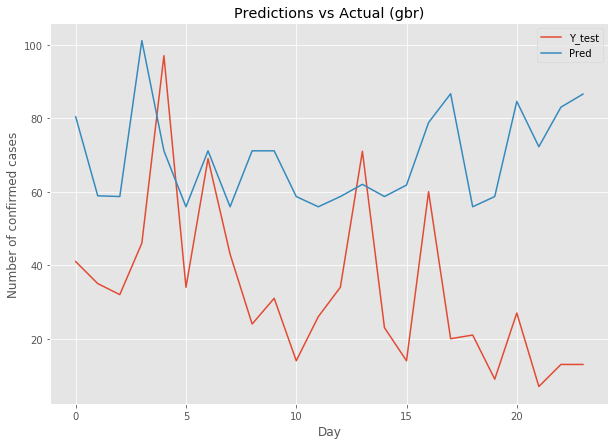

In [191]:
plt.figure(figsize=(10,7))
plt.plot(np.exp(y_test.reset_index(drop=True))-1, label="Y_test")
plt.plot(gbr_pred, label="Pred")
plt.title("Predictions vs Actual (gbr)")
plt.xlabel("Day")
plt.ylabel("Number of confirmed cases")
plt.legend()
plt.show()

<div class="alert alert-info">
Gradient Boosting Regressor has the closest predictions among the 3 models, managing to even pick up the raise and falls. Given such performance, it is no wonder that such model is used widely in data science competitions such as in Kaggle. <br>

We can further improve the predictions by looking at feature importance and doing hyperparameters tuning.
</div>

**Feature Importance**

Filtering less important features

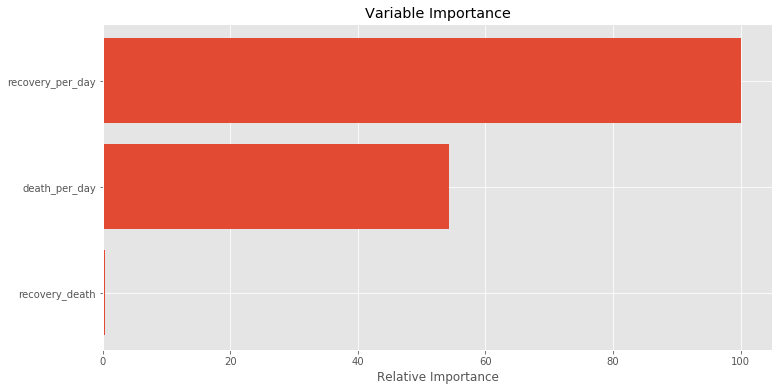

In [151]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max()) # to make it easier to see the effect
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<div class="alert alert-info">
<code>recovery_death</code> has almost no importance in predicting the confirmed cases per day. Hence we will drop that variable and train the model again.
</div>

In [192]:
daegu_data = weather_case_combine_scaled[weather_case_combine_scaled["province"]=="Daegu"]

x_train, x_test, y_train, y_test = train_test_split(daegu_data.drop(["province", "confirmed_per_day", "recovery_death"], axis=1), 
                                                    daegu_data.loc[:, "confirmed_per_day"], test_size=0.30,
                                                    shuffle=False)

In [193]:
gbr2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3,
                                max_depth=3, loss='ls', random_state=0).fit(x_train, y_train)

gbr2_pred = np.exp(gbr2.predict(x_test))-1
print("R Squared:", gbr2.score(x_test, y_test))
print("Mean Squared Error:", mean_squared_error(np.exp(y_test)-1, gbr2_pred))

R Squared: -1.963463593473089
Mean Squared Error: 1734.0756607757457


In [194]:
# mean squared error for each round of validation
print("Mean squared error for each round of validation:")
result_gbr2 = cross_validate(gbr2, x_test, y_test, cv=10, scoring="neg_mean_squared_error")
pd.DataFrame(abs(result_gbr2["test_score"])).T

,0,1,2,3,4,5,6,7,8,9
0,0.534,1.090,0.397,0.299,0.290,0.199,0.555,0.297,0.717,0.681


<div class="alert alert-info">
We see that the R Squared has increased slightly while Mean Squared Error has decreased slightly.
</div>

**Hyperparameters Tuning**

In [217]:
import random
from sklearn.model_selection import RandomizedSearchCV

# define the parameter space that will be searched over
param_distributions = {'n_estimators': np.arange(1, 1000), 
                       'max_depth': np.arange(1, 10), 
                       "learning_rate": np.linspace(0.01, 2, num=50)}

# now create a searchCV object and fit it to the data
tuned_gbr = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                               n_iter=10,
                               param_distributions=param_distributions, 
                               scoring="neg_mean_squared_error")

In [218]:
tuned_gbr.fit(x_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [219]:
tuned_gbr.best_params_

{'n_estimators': 590, 'max_depth': 3, 'learning_rate': 1.4314285714285715}

Let's see how our tuned model performs!

In [220]:
gbr3_pred = np.exp(tuned_gbr.predict(x_test))-1
print("R Squared:", tuned_gbr.score(x_test, y_test))
print("Mean Squared Error:", mean_squared_error(np.exp(y_test)-1, gbr3_pred))

R Squared: -1.274074608182117
Mean Squared Error: 2272.7047550787743


In [225]:
# mean squared error for each round of validation
print("Mean squared error for each round of validation:")
result_gbr3 = cross_validate(tuned_gbr, x_test, y_test, cv=10, scoring="neg_mean_squared_error")
pd.DataFrame(abs(result_gbr3["test_score"])).T

Mean squared error for each round of validation:


,0,1,2,3,4,5,6,7,8,9
0,0.421,0.599,0.301,0.614,0.254,0.301,0.396,0.537,0.640,0.873


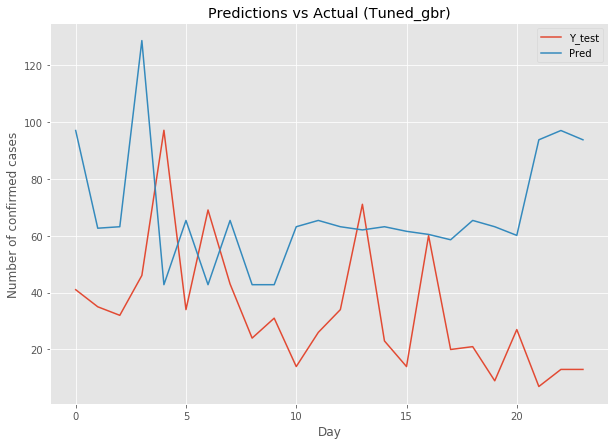

In [221]:
plt.figure(figsize=(10,7))
plt.plot(np.exp(y_test.reset_index(drop=True))-1, label="Y_test")
plt.plot(gbr3_pred, label="Pred")
plt.title("Predictions vs Actual (Tuned_gbr)")
plt.xlabel("Day")
plt.ylabel("Number of confirmed cases")
plt.legend()
plt.show()

<div class="alert alert-info">
Although the tuned model has a larger R Squared, it's Mean Squared Error has increased compared with our second model. The predictions seem to be closer to the actual values compared to the previous 2 models. Overall, this is a good sign as our model is improving...though it still cannot be deployed for real world usage.
</div>

<h1>Conclusion</h1>

<div class="alert alert-info">
In conclusion, we have found that in general, the weather conditions do not have a correlation with the number of confirmed cases. However, when we break it down to the different provinces, we found that some of the weather conditions do have some correlation with the number of confirmed cases per day. In order to avoid predicting negative values, we took the log of the confirmed cases per day. <br>

We used 3 main models - Ridge Regression, Lasso Regression and Gradient Boosting Regressor. 
- Ridge was the worst performing model among the 3 while Gradient Boosting Regressor is the best. 
- We went on to tune our Regressor by feeding it the more important independent variables and conducted a random search for the best set of hyperparameters. 
    
At the end, we got a model that could predict values (non negative) which are relatively close to the acutal values.
</div>

<div align="center">--- The End ---</div>